# **Heart Disease Prediction**

## **1. Problem Statement and Goa**l

**Objective**

I aim to build a binary classification model that predicts whether a person is at risk of heart disease based on their medical and health attributes. Early prediction can help in timely diagnosis and preventive care.

### Approach

I will:

- Load the **Heart Disease UCI dataset**
- Clean the dataset and handle missing values
- Perform **Exploratory Data Analysis (EDA)** to understand patterns
- Train classification models:
  - `Logistic Regression`
  - `Decision Tree`
- Evaluate the models using:
  - `Accuracy`
  - `Confusion Matrix`
  - `ROC Curve` and `ROC-AUC`
- Identify important features affecting prediction

## **2. Import Required Libraries**

In [11]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


# **3. Load Dataset**

Dataset: Heart Disease UCI Dataset (downloaded from Kaggle)

In [12]:
# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Display first rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
# Check column names
df.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# **4. Dataset Overview and Exploration**

In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## **5. Data Cleaning**

Checking Missing Values

In [15]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


## **6. Exploratory Data Analysis (EDA)**

Target Variable Distribution

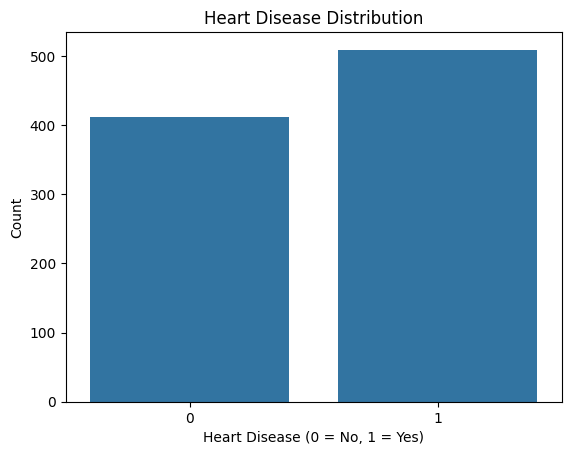

In [16]:
# Convert num column to binary target
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

X = df.drop(['num', 'target'], axis=1)
y = df['target']


## **Correlation Heatmap**

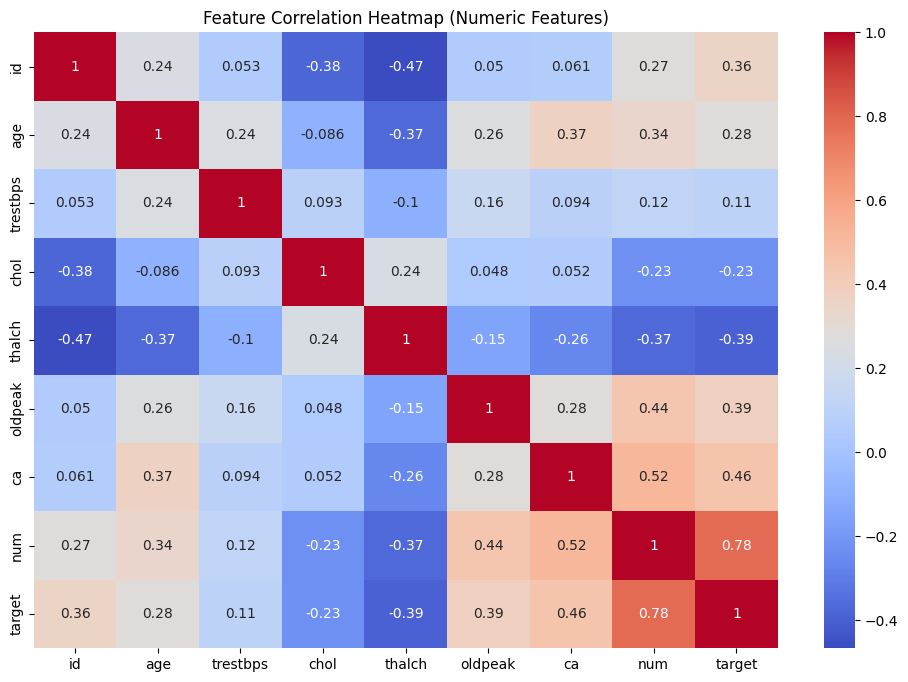

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numeric Features)")
plt.show()


## **Age vs Heart Disease**

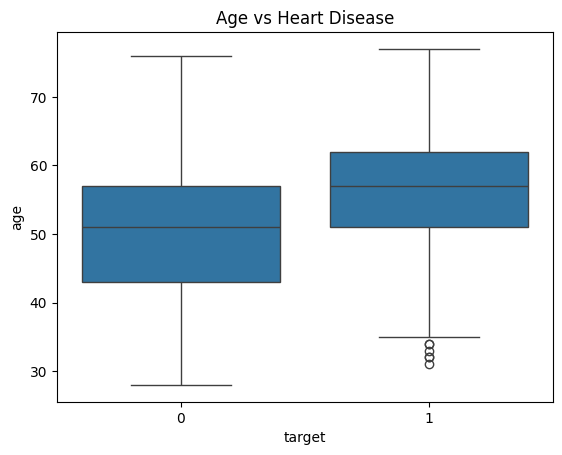

In [19]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()


## **7. Feature Selection and Scaling**

In [21]:


# Drop non-predictive ID column
df = df.drop('id', axis=1)

# Create binary target variable from 'num'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Separate features and target
X = df.drop(['num', 'target'], axis=1)
y = df['target']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Display processed data
X_scaled.head(), y.head()


(        age  trestbps      chol    thalch   oldpeak        ca  sex_Male  \
 0  1.007386  0.675287  0.305908  0.480653  1.303159 -0.724064  0.516931   
 1  1.432034  1.462483  0.784599 -1.140262  0.569611  2.487454  0.516931   
 2  1.432034 -0.636705  0.269780 -0.329805  1.578239  1.416948  0.516931   
 3 -1.752828 -0.111908  0.459450  1.908602  2.403480 -0.724064  0.516931   
 4 -1.328180 -0.111908  0.043982  1.329704  0.477918 -0.724064 -1.934494   
 
    dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  ...  \
 0        -0.683597            -0.392847              -0.527046  ...   
 1        -0.683597            -0.392847              -0.527046  ...   
 2        -0.683597            -0.392847              -0.527046  ...   
 3        -0.683597            -0.392847              -0.527046  ...   
 4        -0.683597            -0.392847              -0.527046  ...   
 
    cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
 0       -0.533775           4.358899  2.

## **8. Train-Test Split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## **9. Model Training**

Logistic Regression

In [26]:
from sklearn.impute import SimpleImputer


# Safely drop non-predictive column if it exists
df = df.drop(columns=['id'], errors='ignore')

# Create binary target variable
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Separate features and target
X = df.drop(['num', 'target'], axis=1)
y = df['target']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[:, 1]

# Sample output
lr_pred[:10]


array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

Decision Tree Classifier

In [27]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:,1]


## **10. Model Evaluation**

Accuracy

In [28]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Logistic Regression Accuracy: 0.8369565217391305
Decision Tree Accuracy: 0.7608695652173914


Confusion Matrix (Logistic Regression)

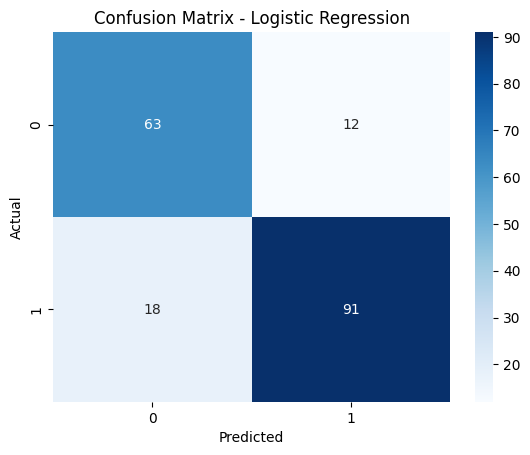

In [29]:
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC Curve and AUC

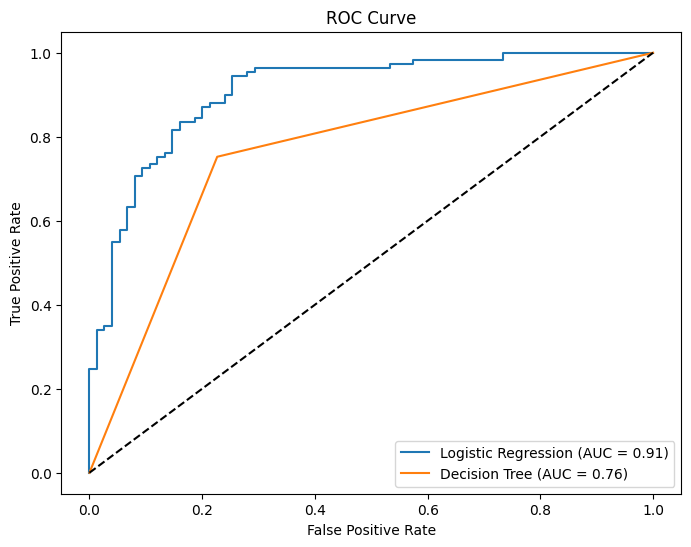

In [30]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
auc_lr = roc_auc_score(y_test, lr_prob)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
auc_dt = roc_auc_score(y_test, dt_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## **11. Feature Importance**

In [32]:
# Create feature importance DataFrame using the encoded feature names
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': lr_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
8,dataset_Switzerland,0.971232
5,ca,0.603348
6,sex_Male,0.584687
4,oldpeak,0.547650
16,exang_True,0.404098
17,slope_flat,0.342521
20,thal_reversable defect,0.201213
9,dataset_VA Long Beach,0.182799
2,chol,0.166002
1,trestbps,0.090808


## **12. Results Discussion and Insights**

### Observations

- Logistic Regression performed more consistently than Decision Tree.
- Decision Tree showed signs of overfitting.
- ROC-AUC scores indicate strong classification performance.

### Key Insights

- Chest pain type, maximum heart rate, and ST depression are strong predictors.
- Age and cholesterol significantly influence heart disease risk.
- Logistic Regression is more suitable for medical classification tasks.
- The model can assist in early risk assessment but should not replace medical diagnosis.
